In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
# #Mounting GoogleDrive
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
#Reading the file
# df = pd.read_csv("/content/drive/MyDrive/Datasets/Fraud_check.csv")
df=pd.read_csv("Fraud_check.csv")
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df["Taxable.Income"].max()
#df["Taxable.Income"].min()


99619

In [5]:
df1=df.copy()
df1['Taxable_cat'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels=['Risky','Good'], right = False)
df1["Taxable_cat"].value_counts()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


<Axes: >

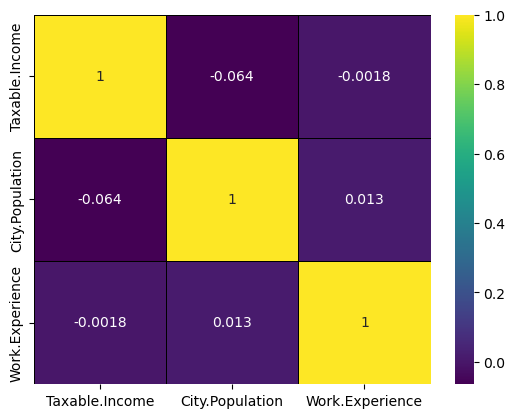

In [6]:
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis",  linewidths=0.5, linecolor='black')

<Axes: xlabel='Work.Experience'>

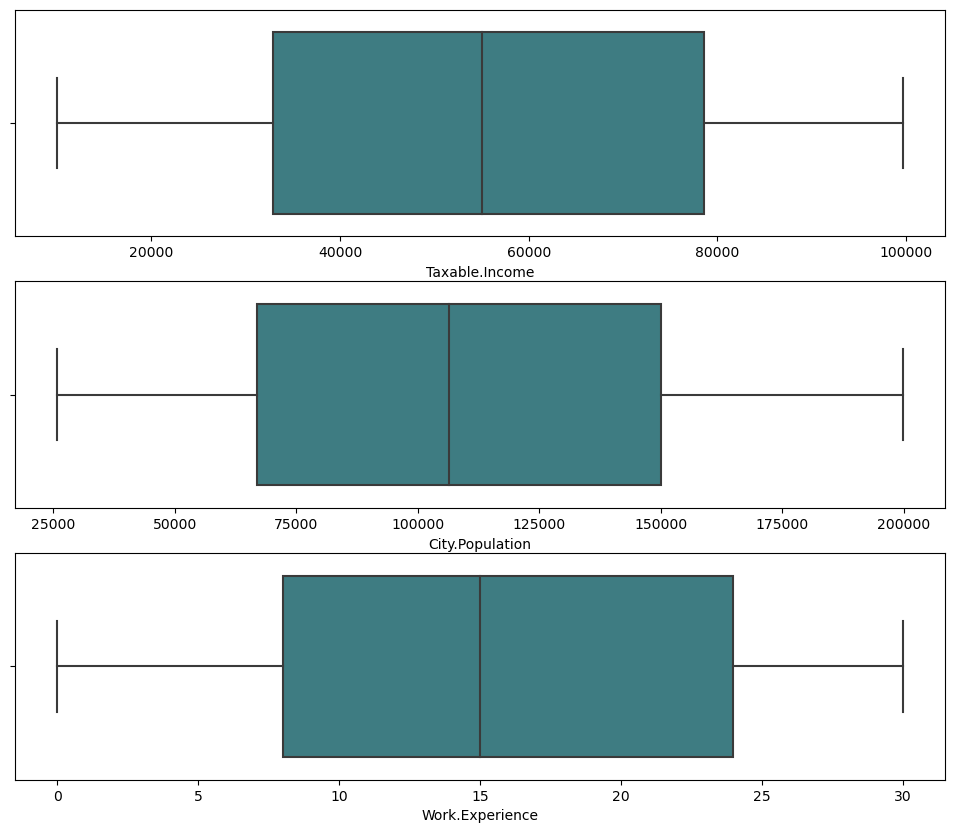

In [7]:
bp=df1.copy()
fig, axes=plt.subplots(3,1,figsize=(12,10),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=bp,palette='crest',ax=axes[0])
sns.boxplot(x="City.Population",data=bp,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=bp,palette='crest',ax=axes[2])

<Figure size 800x800 with 0 Axes>

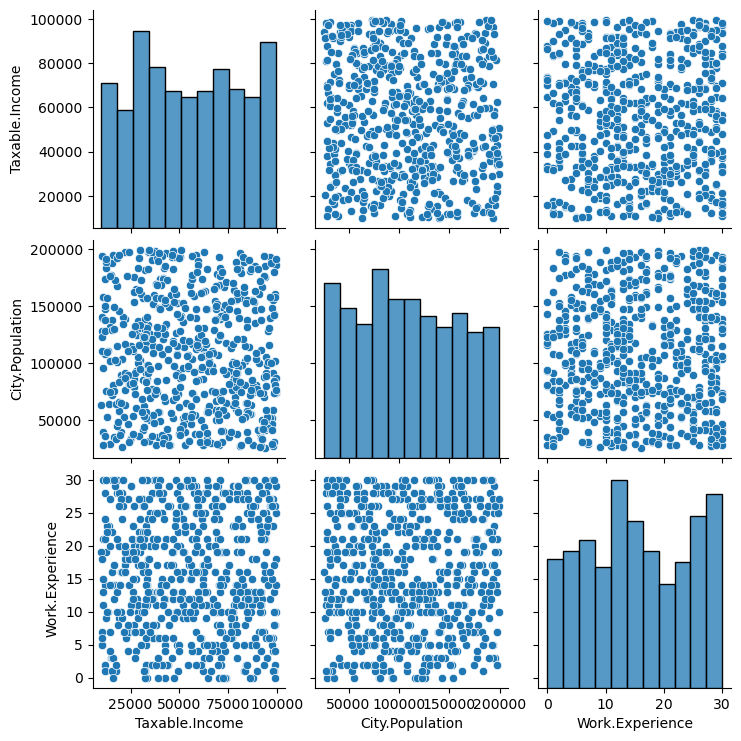

In [8]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='Set1')
plt.show()

Text(0.5, 1.0, 'Risky or Good for Individual Taxable Income ')

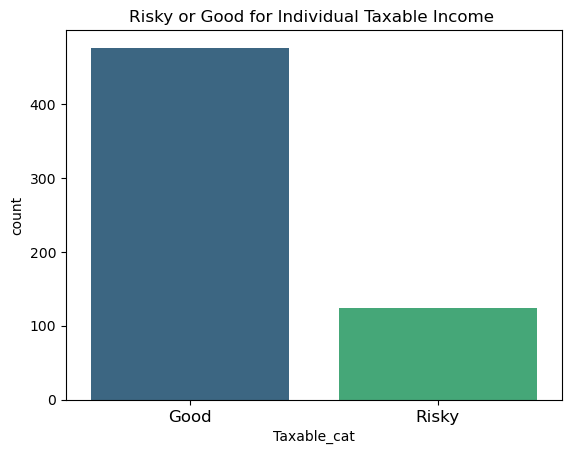

In [9]:
sns.countplot(x='Taxable_cat', data=df1, palette = 'viridis',
              order=df1['Taxable_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')

Text(0.5, 1.0, 'Marital Status ')

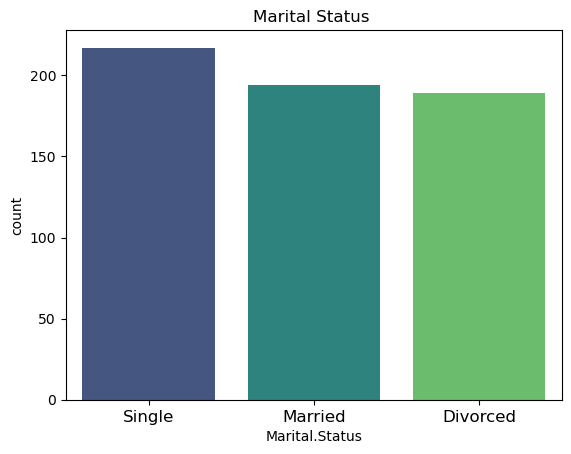

In [10]:
sns.countplot(x='Marital.Status', data=df1, palette = 'viridis',
              order=df1['Marital.Status'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status ')

Text(0.5, 1.0, 'Undergrad ')

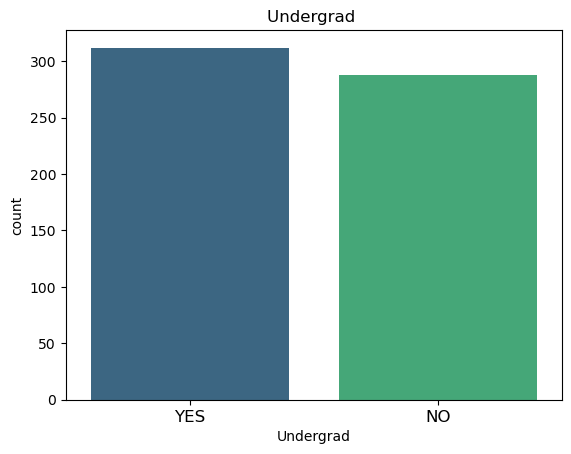

In [11]:
sns.countplot(x='Undergrad', data=df1, palette = 'viridis',
              order=df1['Undergrad'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Undergrad ')

Text(0.5, 1.0, 'Urban')

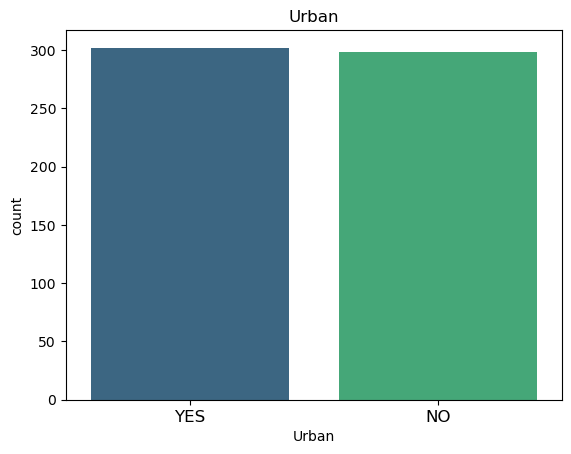

In [12]:
sns.countplot(x='Urban', data=df1, palette = 'viridis',
              order=df1['Urban'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Urban')

In [13]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df1["Taxable_cat"]=LE.fit_transform(df1["Taxable_cat"])
df1["Urban"]=LE.fit_transform(df1["Urban"])
df1["Undergrad"]=LE.fit_transform(df1["Undergrad"])
df1["Marital.Status"]=LE.fit_transform(df1["Marital.Status"])

df1.drop('Taxable.Income', axis=1,inplace=True)

df1.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [14]:
#Data Spliting
X=df1.iloc[:,0:5]
Y=df1[["Taxable_cat"]]


In [15]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)


from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=4)

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

print("Number of Nodes",DT.tree_.node_count)
print("Level of Depth",DT.tree_.max_depth)

0.817
0.761
Number of Nodes 19
Level of Depth 4


In [16]:
# validation set method --> validaton hold-off method
training_accuracy = []
test_accuracy = []
Tr = []
Ts = []

DT = DecisionTreeClassifier(max_depth=1)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

Average trianing accuray 0.79
Average test accuray 0.79


In [17]:
#Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning
df1_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
df1_entropy.fit(X_train,Y_train)

Y_pred_train = df1_entropy.predict(X_train)
Y_pred_test = df1_entropy.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

1.0
0.656


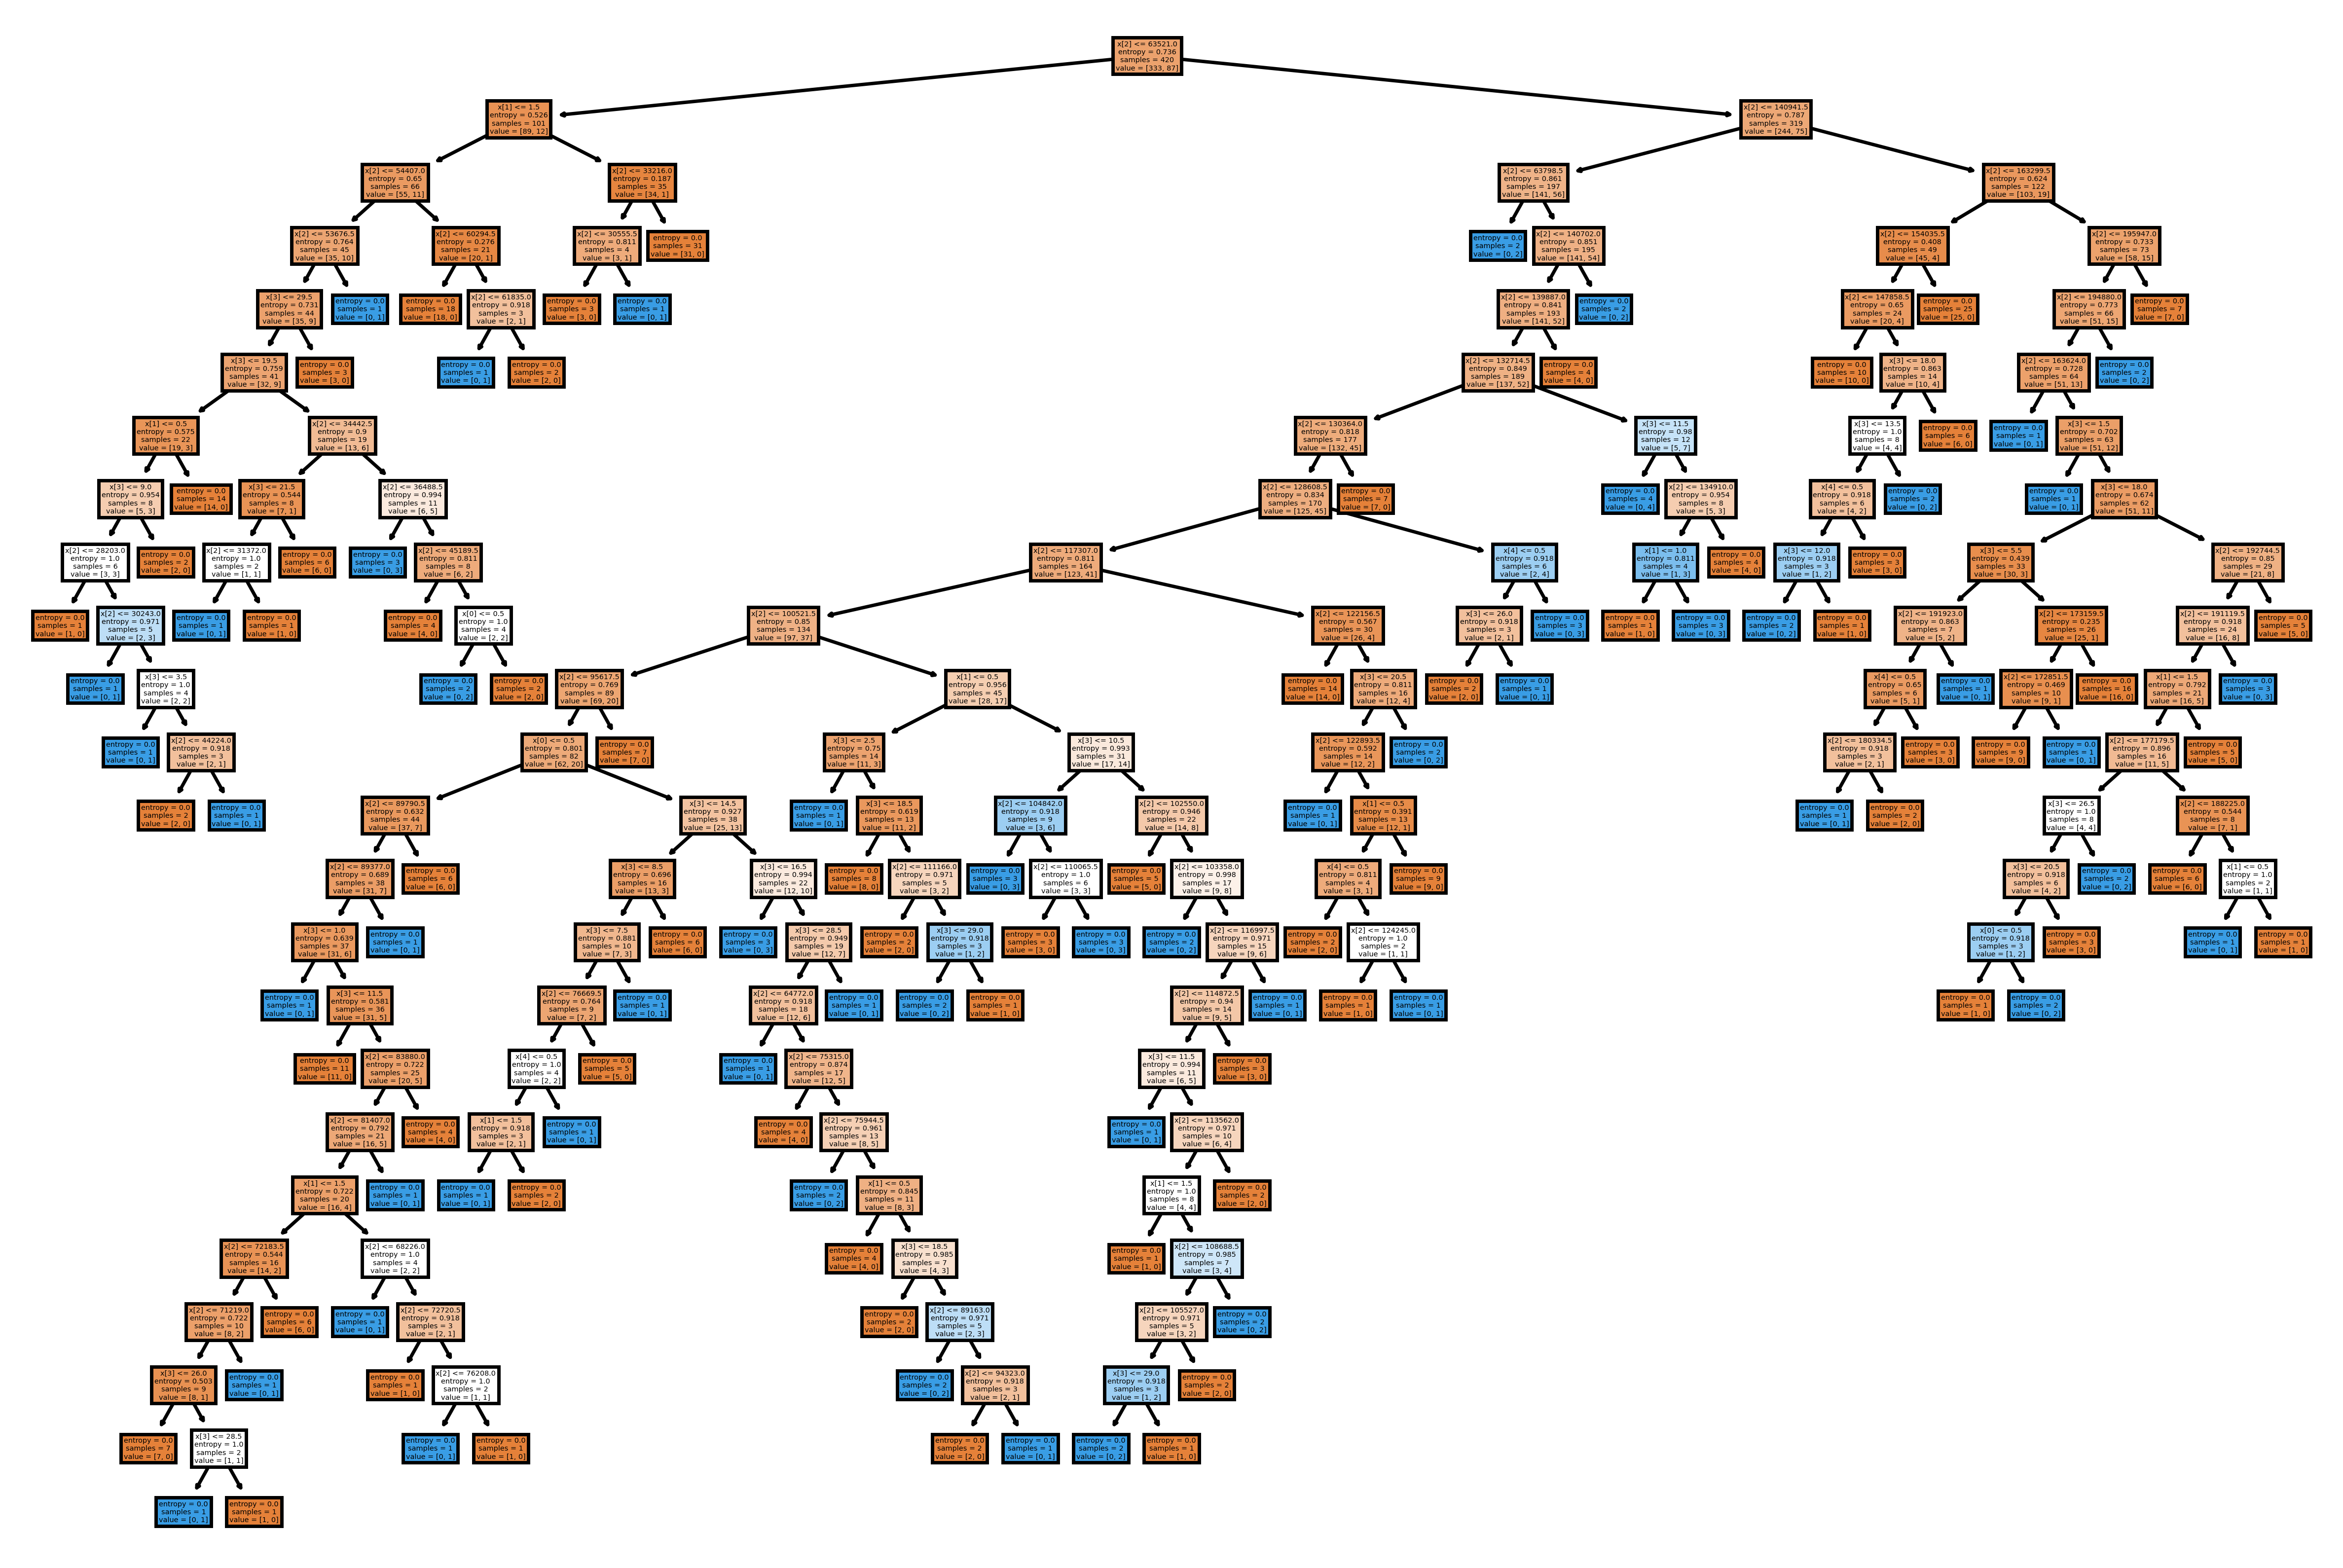

In [18]:
plt.figure(figsize=(12,8),dpi=500)
tree.plot_tree(df1_entropy,filled=True)
plt.show()

In [19]:
path = df1_entropy.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.012153729066798735


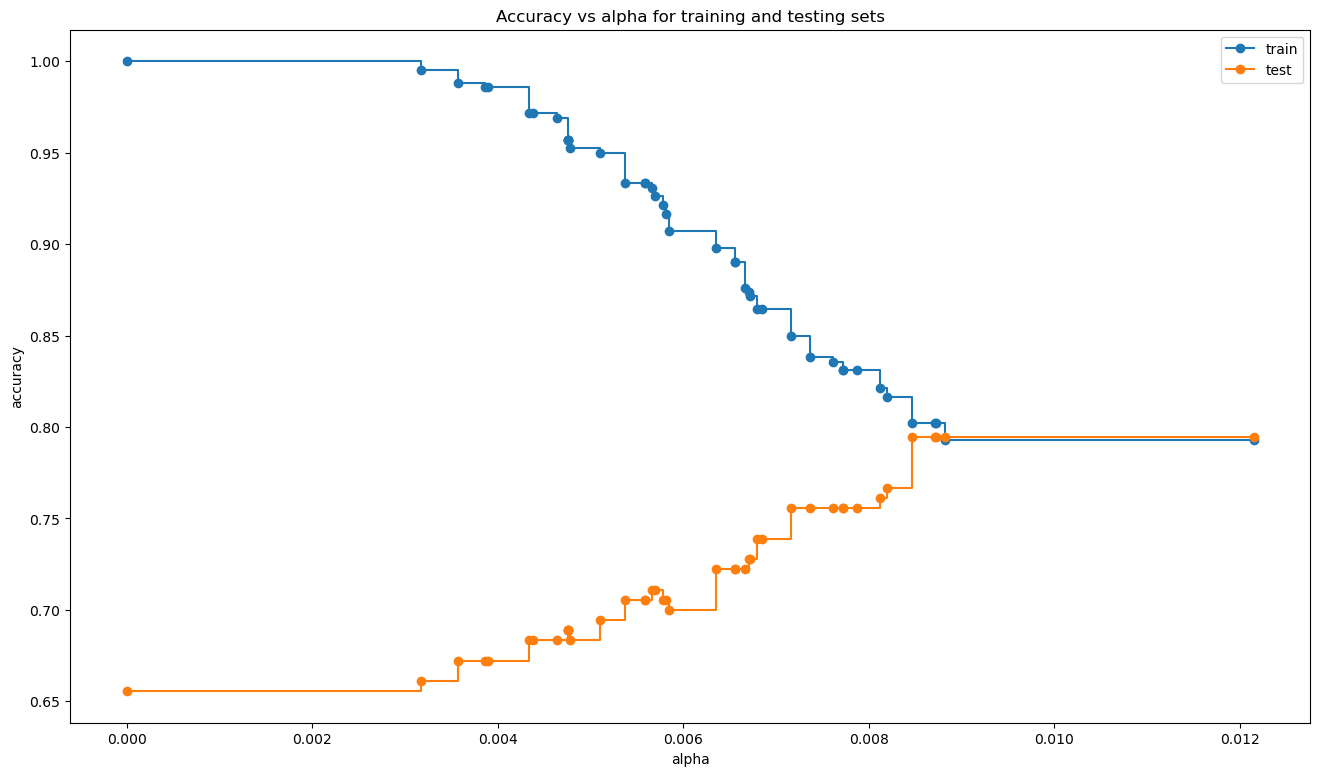

In [20]:
#Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [21]:
#Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.008543)
clf.fit(X_train,Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)


0.802
0.794


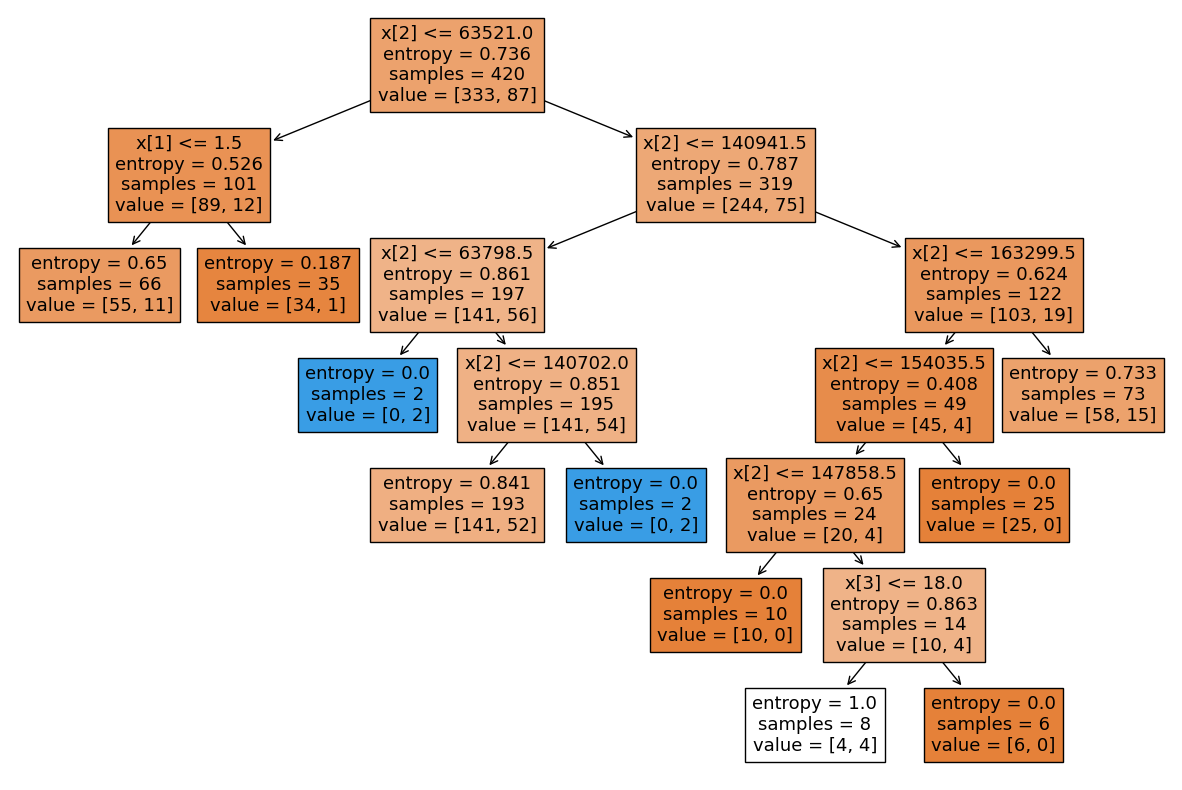

In [22]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [23]:
#Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

df1_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
df1_gini.fit(X_train,Y_train)

Y_pred_train = df1_gini.predict(X_train)
Y_pred_test = df1_gini.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)


1.0
0.617


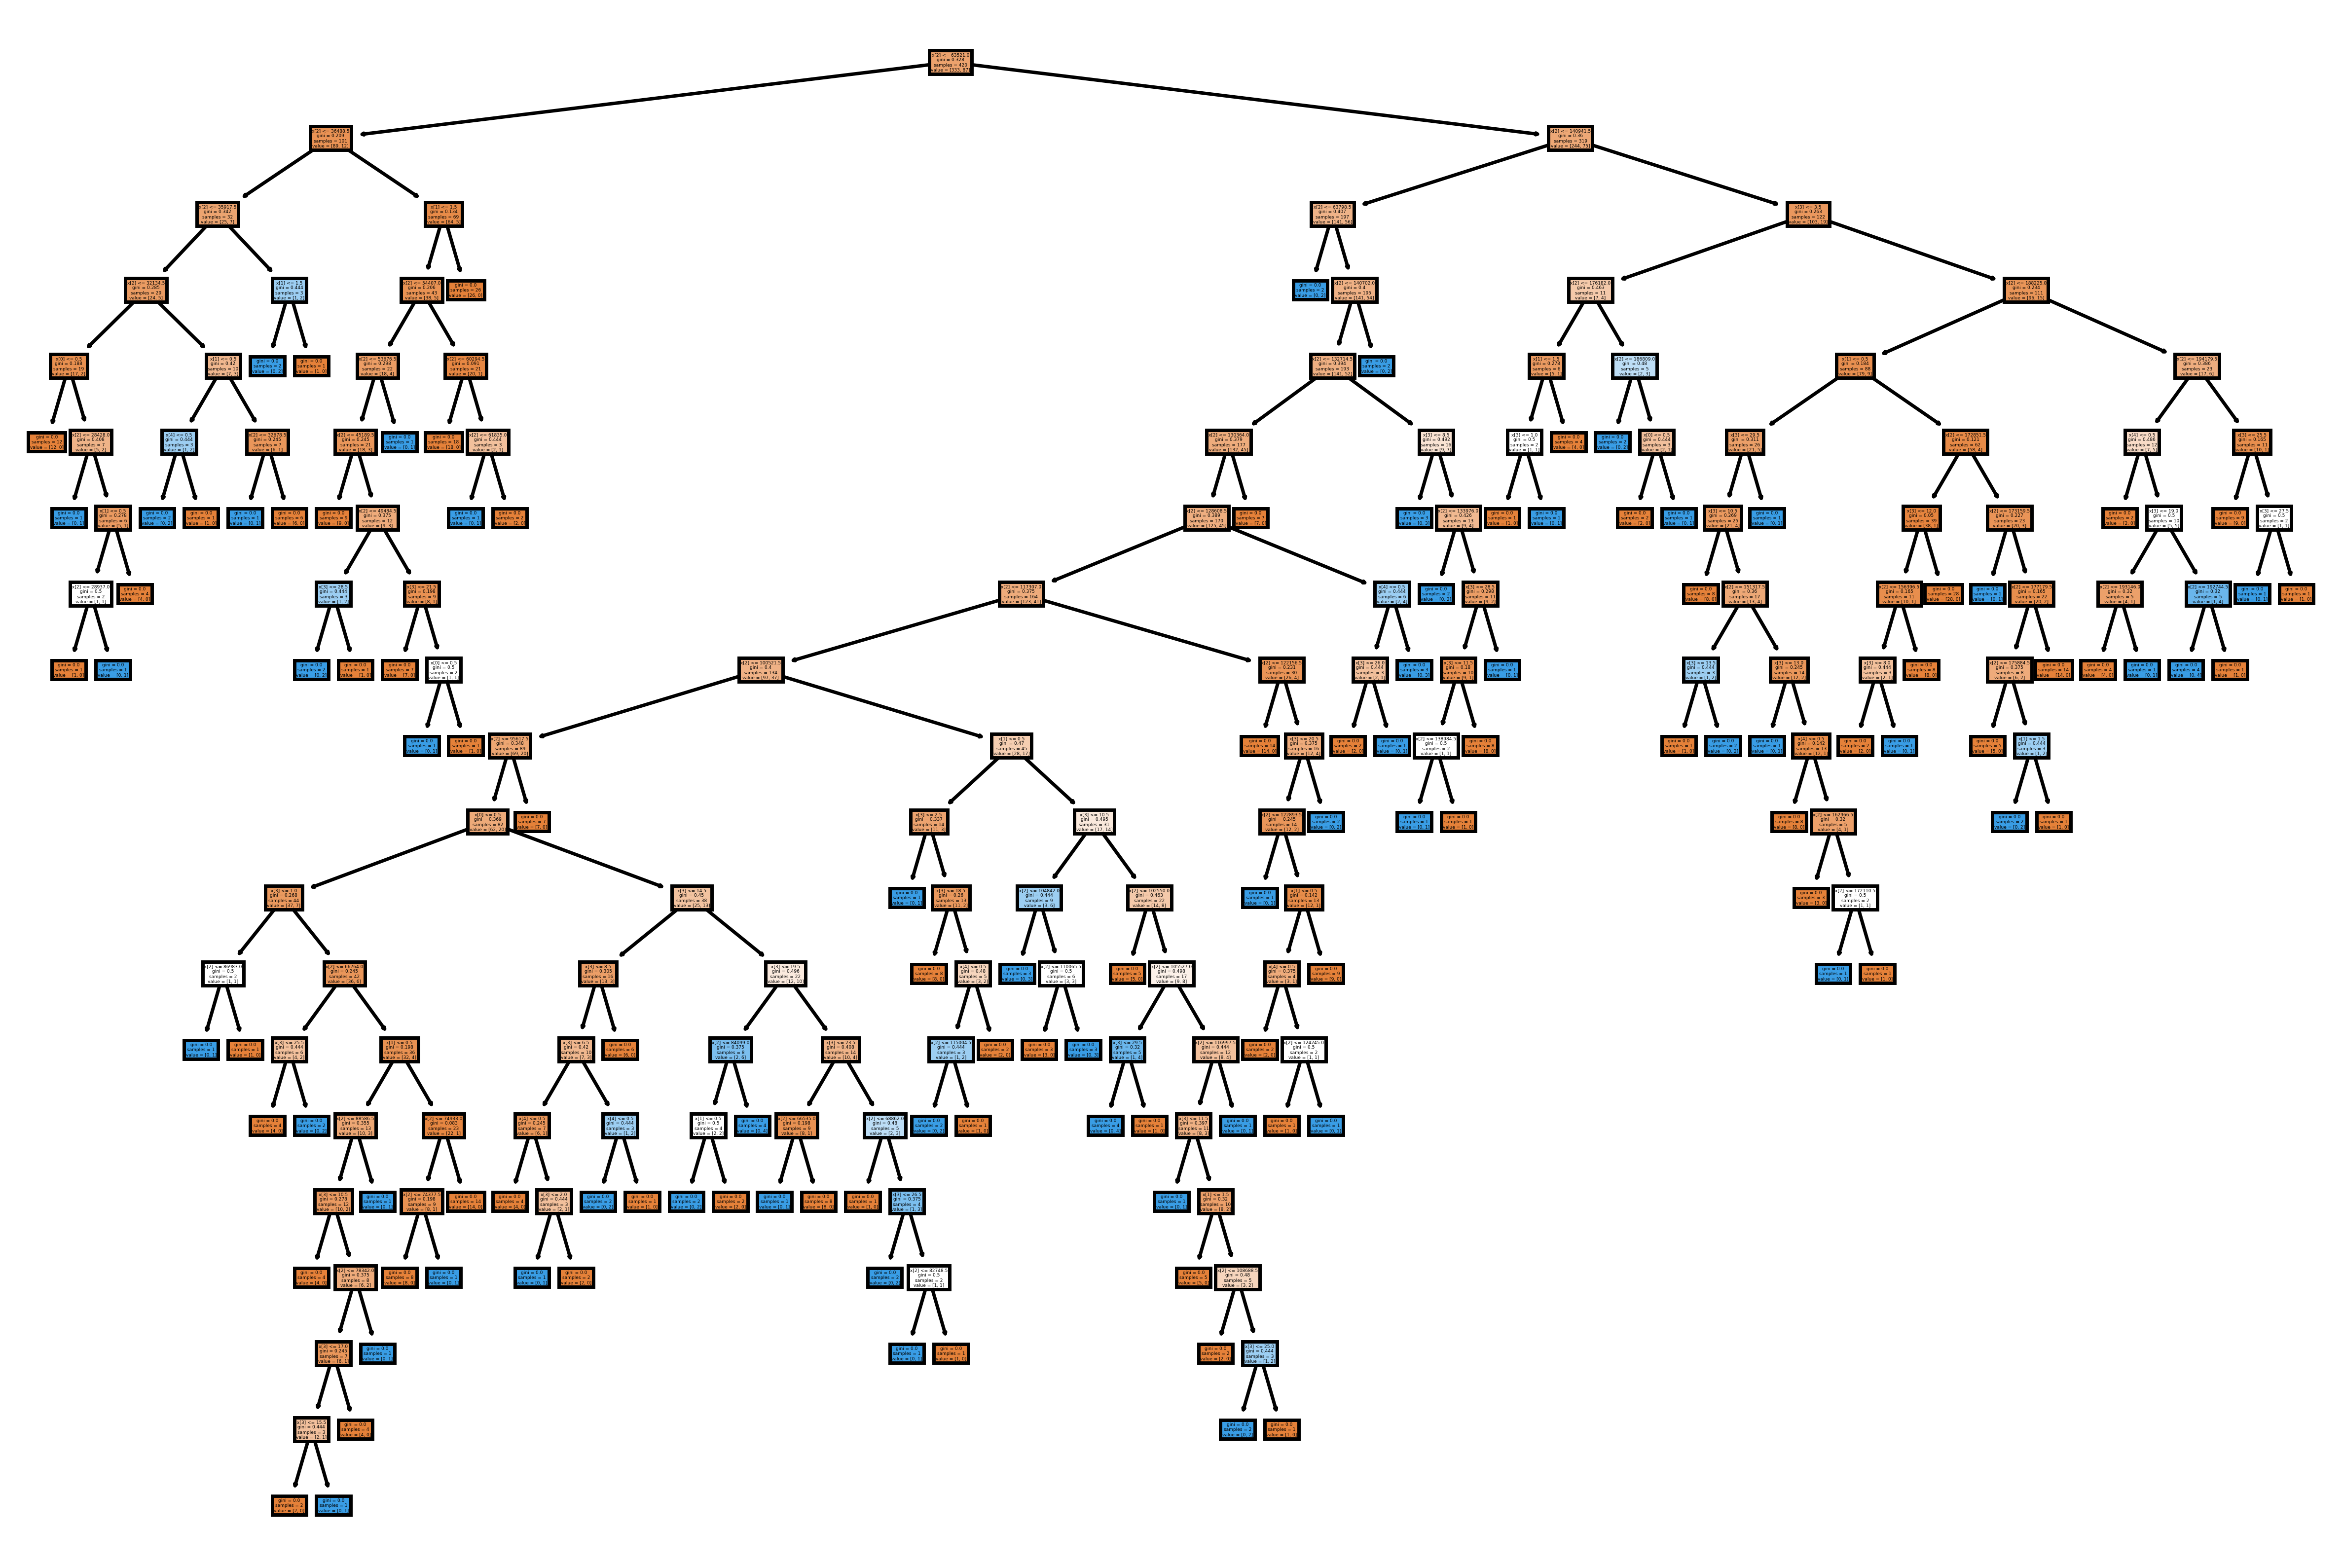

In [24]:
plt.figure(figsize=(12,8),dpi=500)
tree.plot_tree(df1_gini,filled=True)
plt.show()

In [25]:
path = df1_gini.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.005433600290856655


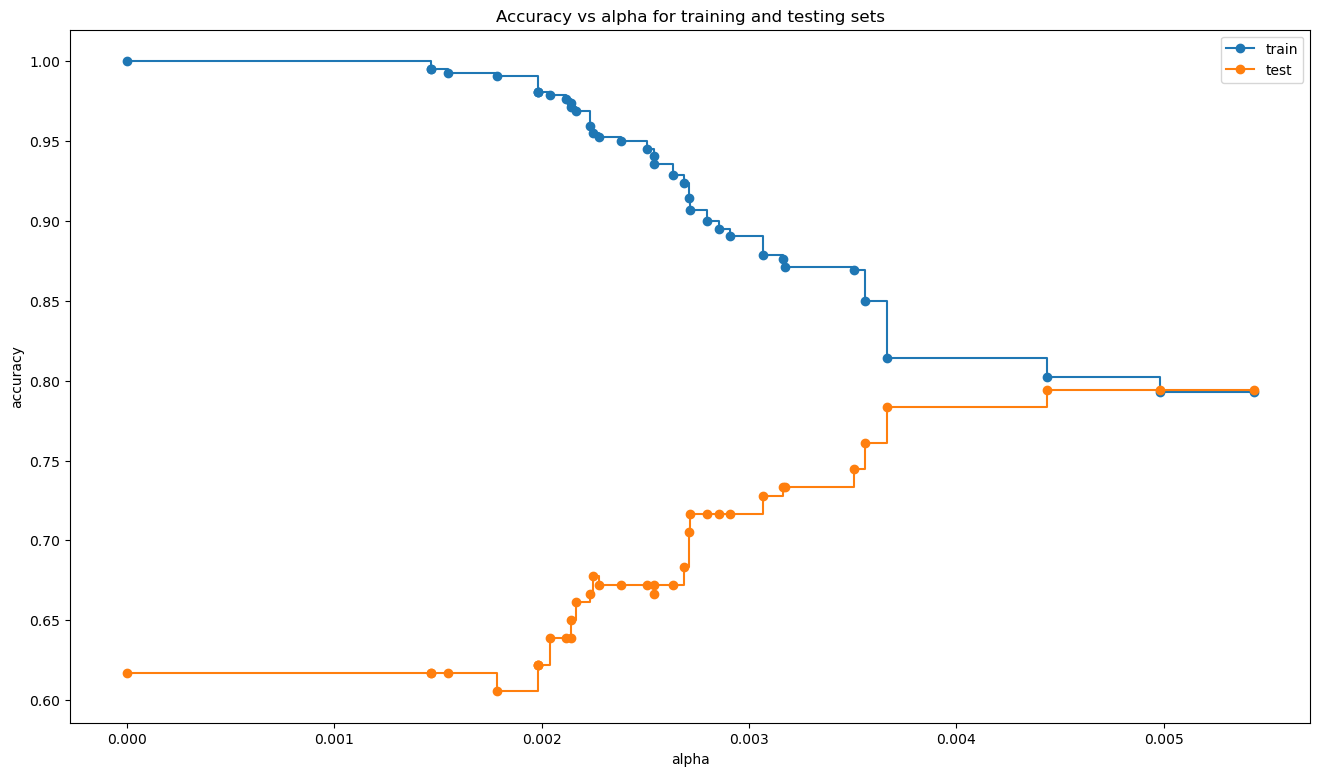

In [26]:
#Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [27]:
#Choosing the best value of cc_alpha where the testing and training accuracy are almost same or near or closer to each other
clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.00499)
clf.fit(X_train,Y_train)

Y_pred_train = clf.predict(X_train)
Y_pred_test = clf.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.793
0.794


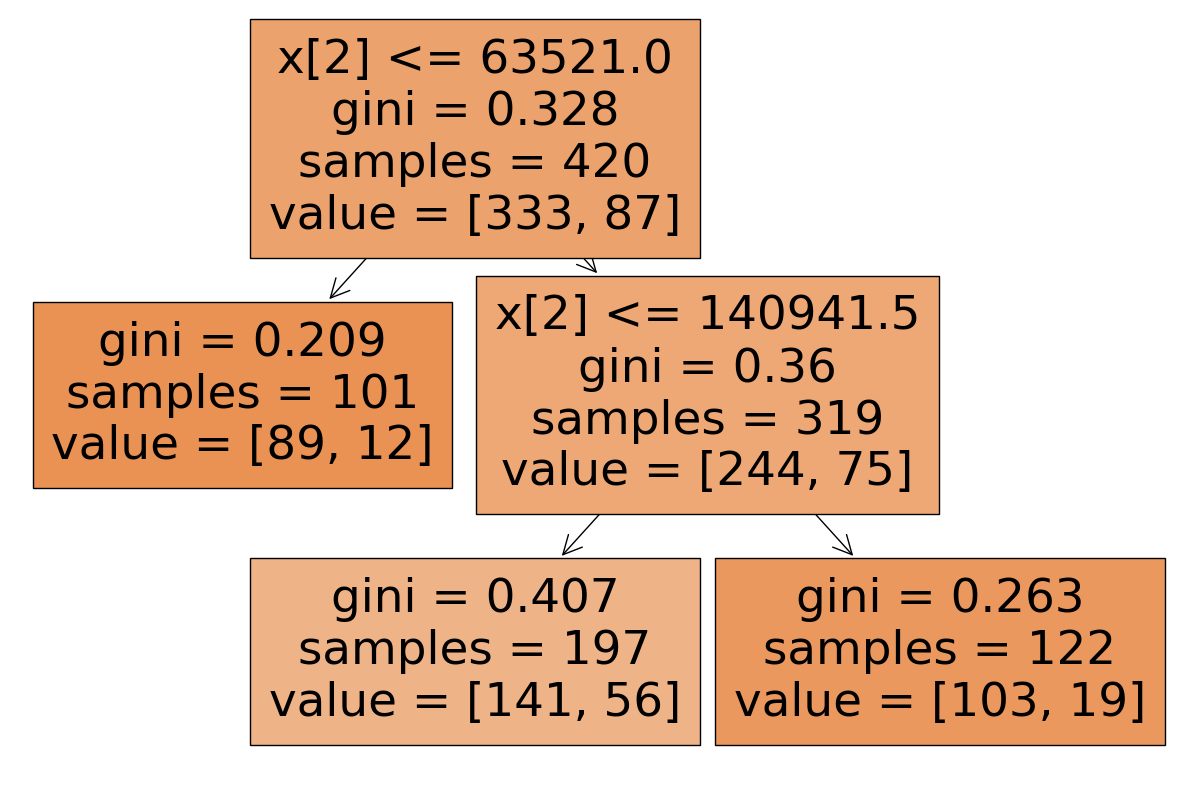

In [28]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()